# Logistic Regression
[Source code](https://github.com/wendianaxu/cs-0451-blog/blob/main/posts/logistic-regression/logistic_regression.py)

## Implementing logistic regression
### Standard gradient descent
I implemented gradient descent in a for-loop where the maximum number of iterations is the <code>max_epoch</code> specified in the <code>fit()</code> method. 

In each iteration (epoch), $w$ is first updated:

In [ ]:
self.w -= alpha*self.gradient(self.w, X_, y)

where the <code>gradient()</code> function computes the gradient of logistic loss associated with the previous $w$. 

Then, we compute the loss and accuracy of the current $w$ and pass them to corresponding variables. 

Finally, a if-statement within the for-loop checks if the current loss is close to the previous loss and breaks the loop if they are close (i.e. the minimum loss is found). 

### Stochastic gradient descent
For <code>fit_stochastic()</code>, an update is performed in each iteration within the for-loop where a different set of random points is picked each time:

In [ ]:
for batch in np.array_split(order, n // batch_size + 1):
    ...
    # gradient step
    self.w -= alpha*self.gradient(self.w, x_batch, y_batch)

This for-loop is nested within another for-loop that represents epochs. After updates are performed in all batches, loss and accuracy for the current epoch is calculated and the current loss is checked against the previous loss to see if the minimum is reached. 

## Experiments

### Simple experiment
First, I will test my implementation on a simple dataset, using the code from the demo on the assignment page, to make sure it works as we expect. 

0.93


<AxesSubplot:xlabel='Feature 1', ylabel='Feature 2'>

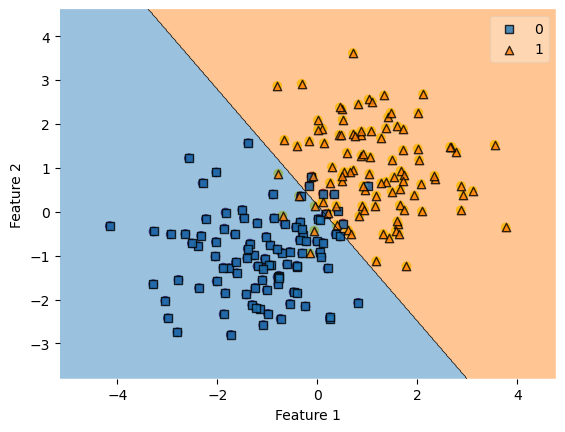

In [6]:
from mlxtend.plotting import plot_decision_regions

np.seterr(all='ignore') 

# make the data
p_features = 3
X, y = make_blobs(n_samples = 200, n_features = p_features - 1, centers = [(-1, -1), (1, 1)])

fig = plt.scatter(X[:,0], X[:,1], c = y)
xlab = plt.xlabel("Feature 1")
ylab = plt.ylabel("Feature 2")

# fit the model
LR = LogisticRegression()
LR.fit(X, y, alpha = 0.1, max_epochs = 1000)

# show score
print(LR.score(X, y))

# plot decision regions
plot_decision_regions(X, y, clf = LR)


The model has a score of 0.93 and classifies the data quite accurately according to the graph. 

</details>

### Learning rate is too large
In this example, gradient descent with $\alpha$ = 0.1 converged before the 1000 steps. However, using the same data set with $\alpha$ increased to 10, the loss kept oscillating and never converged. This demonstrates how gradient descent would fail to converge when the learning rate is too large. 

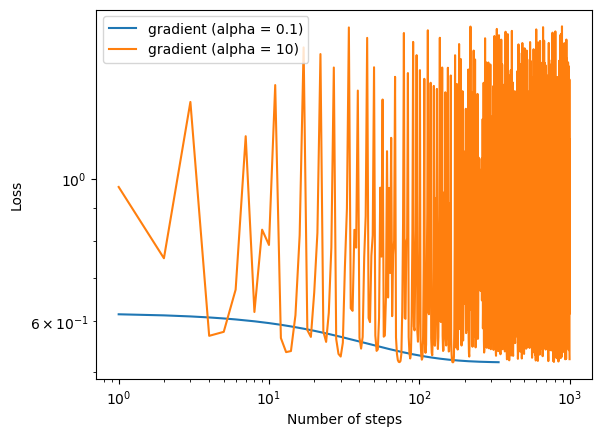

In [2]:
from logistic_regression import LogisticRegression
from sklearn.datasets import make_blobs
from matplotlib import pyplot as plt
import numpy as np

# generate data
X, y = make_blobs(n_samples = 200, n_features = 2, centers = [(0, 0), (1, 1)])

# alpha = 0.1
LR = LogisticRegression()
LR.fit(X, y, alpha = 0.1, max_epochs = 1000)

# plot
num_steps = len(LR.loss_history)
plt.plot(np.arange(num_steps) + 1, LR.loss_history, label = "gradient (alpha = 0.1)")

# alpha = 10
LR.fit(X, y, alpha = 10, max_epochs = 1000)

# plot
num_steps = len(LR.loss_history)
plt.plot(np.arange(num_steps) + 1, LR.loss_history, label = "gradient (alpha = 10)")

plt.loglog()

xlab = plt.xlabel("Number of steps")
ylab = plt.ylabel("Loss")
legend = plt.legend() 

### Batch size affects speed of convergence
Here, we perform stochastic gradient descent with 4 different batch sizes on a data set with 10 features. The smaller the batch size, the quicker the algorithm converges. 

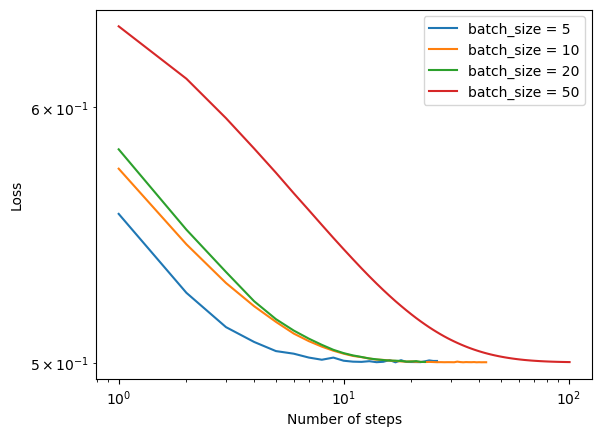

In [7]:
# generate data
X, y = make_blobs(n_samples = 200, n_features = 10, centers = [(0, 0), (1, 1)])

# batch_size = 5
LR = LogisticRegression()
LR.fit_stochastic(X, y, alpha = 0.1, max_epochs = 1000, batch_size = 5)

# plot
num_steps = len(LR.loss_history)
plt.plot(np.arange(num_steps) + 1, LR.loss_history, label = "batch_size = 5")

# batch_size = 10
LR.fit_stochastic(X, y, alpha = 0.1, max_epochs = 1000, batch_size = 10)

# plot
num_steps = len(LR.loss_history)
plt.plot(np.arange(num_steps) + 1, LR.loss_history, label = "batch_size = 10")

# batch_size = 20
LR.fit_stochastic(X, y, alpha = 0.1, max_epochs = 1000, batch_size = 10)

# plot
num_steps = len(LR.loss_history)
plt.plot(np.arange(num_steps) + 1, LR.loss_history, label = "batch_size = 20")

# batch_size = 50
LR.fit_stochastic(X, y, alpha = 0.1, max_epochs = 1000, batch_size = 50)

# plot
num_steps = len(LR.loss_history)
plt.plot(np.arange(num_steps) + 1, LR.loss_history, label = "batch_size = 50")

plt.loglog()

xlab = plt.xlabel("Number of steps")
ylab = plt.ylabel("Loss")
legend = plt.legend() 